<a href="https://colab.research.google.com/github/joaovictordds/Modelo_Liberacao_Credito/blob/main/credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LIBERAÇÃO DE NOVOS CRÉDITOS AOS CLIENTES**

### 1. IMPORTAÇÃO DAS BIBLIOTECAS E DOS DADOS

In [47]:
# Importação dos dados
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
link = 'https://raw.githubusercontent.com/joaovictordds/Analise_Credito/main/dados_tratados.csv'

In [48]:
import pandas as pd
df = pd.read_csv(link)

In [49]:
df.drop(columns=['Unnamed: 0','motivo'], inplace=True)

In [50]:
df.head(3)

,conta,duração,historico,quantia,poupança,emprego,pagador
0,negativo,6,já atrasou pagamentos,1169,nao,> 7 anos,bom
1,positivo,48,pagamento em dia,5951,ate 1000,1-4 anos,mau
2,sem conta,12,já atrasou pagamentos,2096,ate 1000,4-7 anos,bom


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   conta      1000 non-null   object
 1   duração    1000 non-null   int64 
 2   historico  1000 non-null   object
 3   quantia    1000 non-null   int64 
 4   poupança   1000 non-null   object
 5   emprego    1000 non-null   object
 6   pagador    1000 non-null   object
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [52]:
#Backup
backup = df

### 2. PRÉ PROCESSAMENTO

In [53]:
df.sample(3)

,conta,duração,historico,quantia,poupança,emprego,pagador
643,sem conta,24,já atrasou pagamentos,1851,ate 1000,4-7 anos,bom
702,positivo,24,pagamento em dia,1377,nao,> 7 anos,bom
357,sem conta,36,já atrasou pagamentos,4463,ate 1000,1-4 anos,mau


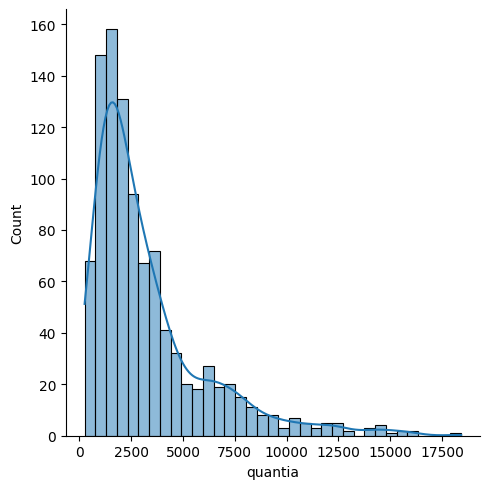

In [54]:
# visualizando com grafico com uma linha de suavização
import seaborn as sns
sns.displot(df.quantia, kde=True);

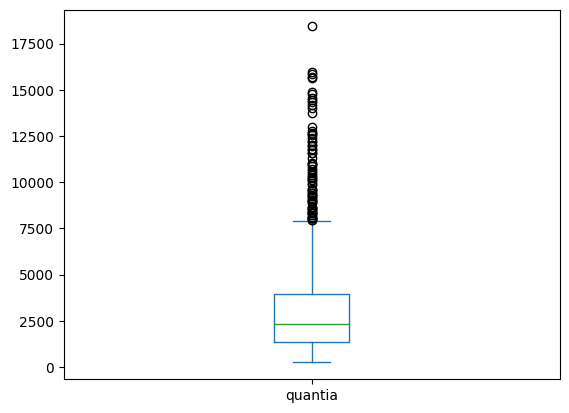

In [55]:
#Verificação de outliers
df['quantia'].plot(kind='box');

*UTILIZAR RANDOM FOREST OU GRADIENT BOOSTING POIS OS OUTLIERS CORRESPONDEM A APROX. 9% DOS DADOS.*

In [56]:
# Subs. a variavel alvo para booleano
df['pagador'] = df['pagador'].replace(['bom','mau'],[0,1])

In [57]:
# Normalização Z (Padronização)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['duração','quantia']] = scaler.fit_transform(df[['duração','quantia']])

In [58]:
# dummificação de variaveis
df = pd.get_dummies(df, columns=['conta'	,'historico'	,'poupança',	'emprego'	])

In [59]:
df.head(3)

,duração,quantia,pagador,conta_negativo,conta_positivo,conta_sem conta,historico_já atrasou pagamentos,historico_pagamento em dia,poupança_>1000,poupança_ate 1000,poupança_nao,emprego_1-4 anos,emprego_4-7 anos,emprego_> 7 anos,emprego_desempregado
0,-1.236478,-0.745131,0,1,0,0,1,0,0,0,1,0,0,1,0
1,2.248194,0.949817,1,0,1,0,0,1,0,1,0,1,0,0,0
2,-0.738668,-0.416562,0,0,0,1,1,0,0,1,0,0,1,0,0


### 4. MACHINE LEARNING

#### 4.1 RANDOM FOREST

In [41]:
# separação de variáveis preditoras e variável resposta
y = df['pagador']
# Remova a coluna 'Creditability' do DataFrame original
X = df.drop('pagador', axis=1)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

modelo = RandomForestClassifier(n_estimators = 100, # nº de arvores
                                # max_features = 'auto', # qtde de nós que a arvore observa em um nó
                                bootstrap = True, # Na literatura essa aleatoriedade extra tende a gerar melhores resultados
                                max_depth = 7, # profundidade
                                min_samples_split = 20) # numero minimo de amostra num nó permitido, menos que isso ela para de dividir.

medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
print('Média da acurácia: ', round(medidas['test_score'].mean(), 4))

Média da acurácia:  0.7427


#### 4.2 GRADIENT BOOSTING

In [60]:
# separação de variáveis preditoras e variável resposta
y = df['pagador']
# Remova a coluna 'Creditability' do DataFrame original
X = df.drop('pagador', axis=1)

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

# Crie um modelo Gradient Boosting
gradient_boosting = GradientBoostingClassifier(max_depth=7, n_estimators=50, max_leaf_nodes=15, min_samples_split=40)

# Realize a validação cruzada
scores = cross_val_score(gradient_boosting, X, y, cv=validacao, scoring='accuracy')

# Imprima as pontuações de validação cruzada
#print("Pontuações de validação cruzada:", scores)
print("Média da acurácia:", scores.mean().round(4))

Média da acurácia: 0.7443


#### 4.3 TUNAGEM DE HIPERPARAMETROS DO GRADIENTE BOOSTING

In [ ]:
# separação de variáveis preditoras e variável resposta
y = df['pagador']
# Remova a coluna 'Creditability' do DataFrame original
X = df.drop('pagador', axis=1)

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Defina uma grade de hiperparâmetros para pesquisa. Faça quantos testes achar importante para melhoria do modelo
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 4, 5],
              'learning_rate': [0.1, 0.01, 0.001]} #verifique o material do algoritmo sobre os parametros para o seu negocio.

# Criando um modelo Gradient Boosting
gradient_boosting = GradientBoostingClassifier()

# Crie um objeto GridSearchCV para avaliação dos hiperparametros selecionadas
grid_search = GridSearchCV(gradient_boosting, param_grid, cv=validacao, scoring='accuracy')

# Realizando a pesquisa de hiperparâmetros
grid_search.fit(X, y)

# Melhores hiperparâmetros encontrados
best_params = grid_search.best_params_
print(f'Melhores hiperparâmetros encontrados: {best_params}')

# Melhor desempenho
best_score = grid_search.best_score_
print(f'Melhor desempenho (acurácia): {best_score}')

Melhores hiperparâmetros encontrados: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Melhor desempenho (acurácia): 0.7526666666666668


Melhor parametro encontrado na profundidade de arvore 3 com 300 estimadores. Possivelmente encontraria melhores com mais de 300.

#### 4.4 Parametros do Modelo Gradiente (sem tunagem)

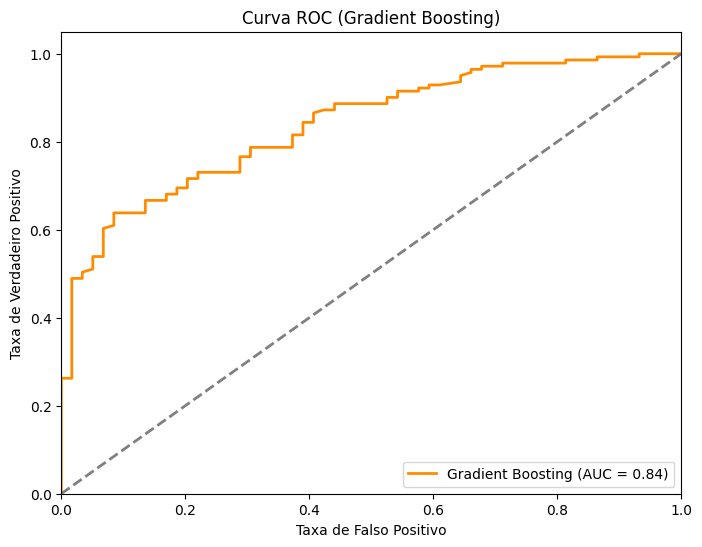

In [23]:
# Curva ROC para o Gradiente
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crie um modelo Gradient Boosting
gradient_boosting = GradientBoostingClassifier()

# Treine o modelo nos dados de treinamento
gradient_boosting.fit(X_train, y_train)

# Obtenha as probabilidades previstas para a classe positiva
y_prob_gb = gradient_boosting.predict_proba(X_test)[:, 1]

# Calcule a curva ROC
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plote a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC (Gradient Boosting)')
plt.legend(loc='lower right')
plt.show()

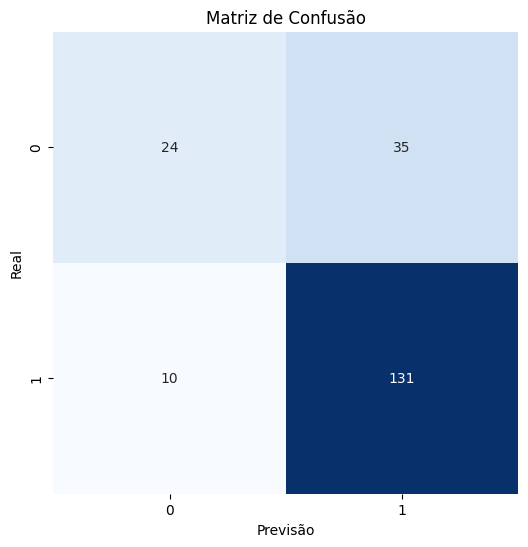

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Treine seu modelo Gradient Boosting
gradient_boosting.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = gradient_boosting.predict(X_test)

# Crie a matriz de confusão
confusion = confusion_matrix(y_test, y_pred)

# Plote a matriz de confusão
plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

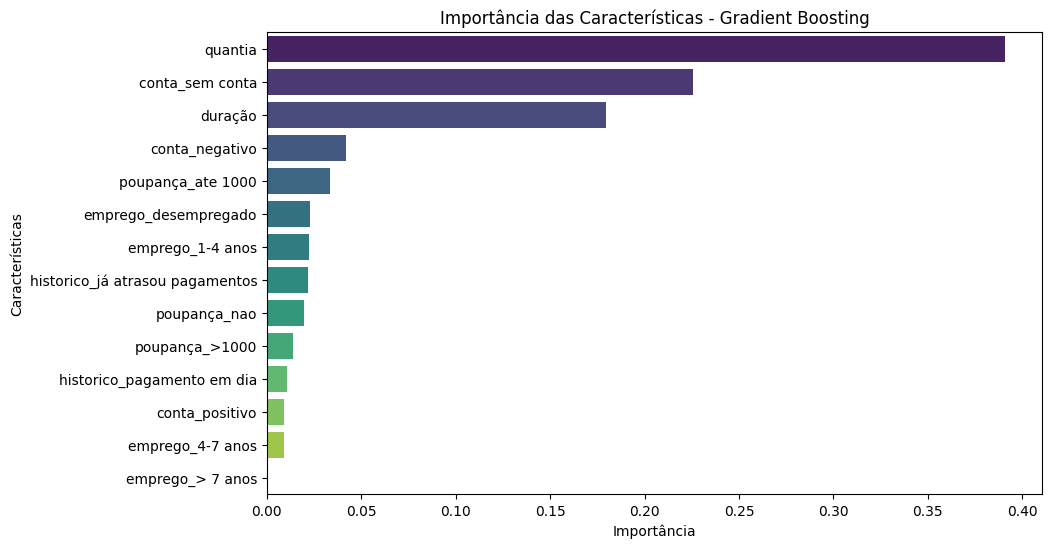

In [26]:
# Importância das características
importancia_caracteristicas = gradient_boosting.feature_importances_

# Criar um DataFrame para visualizar a importância das características
df_importancia = pd.DataFrame({'Feature': X_train.columns, 'Importance': importancia_caracteristicas})
df_importancia = df_importancia.sort_values(by='Importance', ascending=False)

# Criar um gráfico de barras
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_importancia, palette='viridis')
plt.title('Importância das Características - Gradient Boosting')
plt.xlabel('Importância')
plt.ylabel('Características')
plt.show()

### 5. PREPARO DO MODELO SELECIONADO (Gradiente)

In [39]:
backup.head(3)

,conta,duração,historico,quantia,poupança,emprego,pagador
0,negativo,-1.236478,já atrasou pagamentos,-0.745131,nao,> 7 anos,1
1,positivo,2.248194,pagamento em dia,0.949817,ate 1000,1-4 anos,0
2,sem conta,-0.738668,já atrasou pagamentos,-0.416562,ate 1000,4-7 anos,1


In [ ]:
# Selecionando variaveis para treino/testes
dft = df[['quantia', 'conta', 'duração','idade','historico', 'pagador']]

In [62]:
# Preparo do pipeline para futuros inputs de novos dados
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import joblib

# Seus dados e variáveis
X = backup[['conta', 'duração','historico','quantia', 'poupança',	'emprego']]
y = backup['pagador']

# Criando transformações
numeric_features = ['quantia', 'duração']
categorical_features = ['conta', 'historico', 'poupança', 'emprego']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
                                               ('cat', categorical_transformer, categorical_features)])
# Criando o modelo (Tunado)
#modelo_boosting = GradientBoostingClassifier(max_depth=3, n_estimators=300, max_leaf_nodes=15, min_samples_split=40, learning_rate=0.1)

# Criando o modelo Gradiente Boosting
modelo = gradient_boosting

# Criando o pipeline completo
pipeline_boosting = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', modelo)])
# Treinando o modelo com todos os dados
pipeline_boosting.fit(X, y)
# Salvando o modelo em um arquivo pkl
joblib.dump(pipeline_boosting, 'modelo.pkl')

['modelo.pkl']

### 6. TESTE COM NOVOS DADOS

In [29]:
backup.sample(1)

,conta,duração,historico,quantia,poupança,emprego,pagador
281,sem conta,-0.738668,pagamento em dia,-0.601582,ate 1000,1-4 anos,1


In [63]:
#Novos dados
duracao = 12
quantia = 300
conta = 'positivo'
historico = 'pagamento em dia'
poupança = 'ate 1000'
emprego = '1-4 anos'

# Dados
tdados = {'conta': [conta],
         'historico': [historico],
         'poupança': [poupança],
         'emprego': [emprego],
         'duração': duracao,
         'quantia': quantia}

# Criar DataFrame
dtf = pd.DataFrame(tdados)
dtf

,conta,historico,poupança,emprego,duração,quantia
0,positivo,pagamento em dia,ate 1000,1-4 anos,12,300


In [64]:
previsao_novos_dados = pipeline_boosting.predict(dtf)
#print(f'Previsão para novos dados: {previsao_novos_dados[0]}')

if previsao_novos_dados == 0:
  print('Não aprovar novo crédito')
else:
  print('Aprovar')

Aprovar
